In [2]:
### Import libraries ###
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Newton-Cotes
Newton-Cotes formulas are the most common types of numerical integration. They are based on the strategy of replacing a complicated function or tabulated data by an approximation polynomial that is easy to integrate:

$$ I = \int_a^bf(x)dx \approx \int_a^b f_n(x)dx$$

Where $ f_n(x) $ is a polynomial of the form:

$$ f_n(x) = a_0 +a_1x + ... + a_{n-1}x^{n-1} + a_nx^n $$

There are closed and open forms of the Newton-Cotes formulas. The closed forms
are those where the data is known at the beginning and at the end of the limits of integration. Open forms have limits of integration that extend beyond the range of the data. 

## Closed Forms

### 1.-Trapezoidal Rule

The trapezoidal rule is the first of NewtonCotes's closed integration formulas. It corresponds to the case where the polynomial  is of the first degree:

$$ I = \int_a^bf(x)dx \approx \int_a^b f_1(x)dx$$

A function can be converted to a first order polinomial with a Taylor series:

$$ f_1(x) = f(a) + \frac{f(b)-f(a)}{b-a}(x-a)$$

Now lets integrate the approximation:

$$ I =\int_a^b[ f(a) + \frac{f(b)-f(a)}{b-a}(x-a)]dx$$

We open the multiplication of $(x-a)$

$$ I =\int_a^b[ f(a) + \frac{f(b)-f(a)}{b-a}(x)-\frac{f(b)-f(a)}{b-a}(a)]dx$$

We sum up $f(a)$ with the fraction that has no x

$$ I =\int_a^b[\frac{f(b)-f(a)}{b-a}(x)+\frac{f(a)(b-a) - af(b)+af(a)}{b-a}]dx$$

Lets open $f(a)(b-a)$
and solve the integral

$$ I =\frac{f(b)-f(a)}{b-a}\frac{x^2}{2}|_a^b+\frac{bf(a)-af(a) - af(b)+af(a)}{b-a}x|_a^b$$

Lets evaluate the integral  (Notice that $af(a) -af(a)=0$

$$ I =\frac{f(b)-f(a)}{b-a}\frac{(b-a)^2}{2}+\frac{bf(a)-af(b)}{b-a}(b-a)$$

We know that $(b-a)^2 = (b+a)(b-a) $ so:

$$ I =\frac{f(b)-f(a)}{b-a}\frac{(b+a)(b-a)}{2}+\frac{bf(a)-af(b)}{b-a}(b-a)$$

We have $(b-a)$ both in the denominator and numerator of both fraction, lets get rid of it:

$$ I =[f(b)-f(a)]\frac{(b+a)}{2}+bf(a)-af(b)$$

Lets open the multiplication and grup terms

$$ I = f(b)\frac{b+a)}{2}- af(b) -f(a)\frac{b+a}{2}+bf(a)$$

Lets factor out $f(b)$ and $f(a)$

$$ I = f(b)\frac{b+a-2a}{2} + f(a)\frac{2b-b-a}{2}$$

Solve

$$ I = f(b)\frac{b-a}{2} + f(a)\frac{b-a}{2}$$

Factor out:

$$ I = [f(b)+f(a)]\frac{b-a}{2}$$

Re order it:

$$ I = (b-a)\frac{f(b)+f(a)}{2}$$


Allt this math to find something really simple, you can calculate an integral by getting the area of a rectangle 

$$ I = f(h)dx$$

Where $f(h) =\frac{f(b)+f(a)}{2}$ is the mean hight of the interval

**Example:** Evaluate the integral for  $f_x = x^2e^{-x} +2$ with the trapezoidal method from 0 to 4

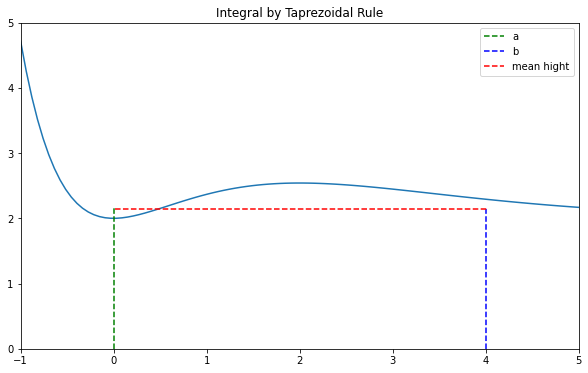

Integral by Trapezodial method: 8.586100444439493
Real Value of Integral:         9.523793
Relative percent Error:         9.85 %


In [13]:
### Trapezoidal method ####
x = np.linspace(-1,5,100)
f_x = (x**2)*np.exp(-x) +2
f= lambda x: (x**2)*np.exp(-x) +2
a=0
b=4
mean = (f(b)+f(a))/2
### End of Method ###

#### MAKE A DESCENT PLOT ####
Trapezoidal_integral =  mean*(b-a)
Real_integral =  9.523793
Relative_percent_error =  100*(Real_integral - Trapezoidal_integral)/Real_integral
### Plot ###
plt.figure(figsize=(10,6))
plt.plot(x,f_x)
plt.axvline(x=a,ymax=0.439,color='green', linestyle='--',label="a")
plt.axvline(x=b,ymax=0.43,color='blue', linestyle='--',label="b")

# Integral
plt.axhline(y=mean,xmin=0.17,xmax=0.837,color='red', linestyle='--',label="mean hight")

plt.title("Integral by Taprezoidal Rule")
plt.xlim((-1,5))
plt.ylim((0,5))
plt.legend()
plt.show()

print(f"Integral by Trapezodial method: {Trapezoidal_integral}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

As we can see this method is easy to implement but it is not accurate, one way to improve the accuracy of the trapezoidal rule is to divide the integration interval from a to b into several segments, and apply the method to each of them.

### 2.- Compound Trapezoidal Method

$$ I = h\frac{f(x_0)+f(x_1)}{2} +h\frac{f(x_1)+f(x_2)}{2}+h\frac{f(x_2)+f(x_3)}{2}+...+h\frac{f(x_{n-1})+f(x_n)}{2}$$

Where $ h= \frac{b-a}{n} $

This can also be written as:

$$ I = \frac{h}{2} [ f(x_0) + 2 [\sum_{i=1}^{n-1}f(x_i)]+f(x_n) ] $$

lets substitute h:

$$ I = \frac{b-a}{2n} [ f(x_0) + 2 [\sum_{i=1}^{n-1}f(x_i)]+f(x_n) ] $$

**Example:** Evaluate the integral for  $f_x = x^2e^{-x} +2$ with the compund trapezoidal method from 0 to 4

In [4]:
### Method with linspace ###
def compound_tapezoidal(a,b,n,f):
    """Compound Trapezoidal method, Input:
       a: First point of evalulation type(float)
       b: Last  point of evaluation  type(float)
       n: Number of points           type(float) 
       f: Function to evaluate       type(lambda)"""
    
    x = np.linspace(a,b,n+1) # Create a vector from the interval [a,b] with n+1 points (since we start counting from 0)
    suma=0                   # Init empty  sumation
    for i in range(1,n):     # Iterate over the ponts, except for the inf and sup points
        suma+= f(x[i])       # Summation
    
    ### Compound trapezoidal formula ###
    integral =  ((b-a)/(2*n))*( f(x[0])+ 2*suma + f(x[n]) )
    
    return integral 
a=0
b=4
n=10
f= lambda x: (x**2)*np.exp(-x) +2
approximation = compound_tapezoidal(a,b,n,f)
Real_integral =  9.523793
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 10 points: 9.521627781304417
Real Value of Integral:         9.523793
Relative percent Error:         0.02 %


In [3]:
### Method without linspace  ###
def compound_tapezoidal_v2(a,b,n,f):
    """Compound Trapezoidal method, Input:
       a: First point of evalulation type(float)
       b: Last  point of evaluation  type(float)
       n: Number of points           type(float) 
       f: Function to evaluate       type(lambda)"""
    
    h= (b-a)/n
    suma=0                   # Init empty  sumation
    for i in range(1,n):     # Iterate over the ponts, except for the inf and sup points
        suma+= f(a+h*i)       # Summation
    
    ### Compound trapezoidal formula ###
    integral =  ((b-a)/(2*n))*( f(a)+ 2*suma + f(b) )
    
    return integral 
a=0
b=4
n=10
f= lambda x: (x**2)*np.exp(-x) +2
approximation = compound_tapezoidal_v2(a,b,n,f)
Real_integral =  9.523793
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 10 points: 9.521627781304417
Real Value of Integral:         9.523793
Relative percent Error:         0.02 %


In addition to applying the trapezoid rule with finer segmentation, another form of obtaining a more accurate estimate of an integral consists in using polynomials of superior ordder to connect the dots. For example, if there is another point midway between f (a) and f (b),
the three points can be joined with a parabola. If there are two equally spaced points between f (a) and f (b), the four points can be joined by a polynomial of third degree. The formulas that result from taking the integrals
under these polynomials they are known as Simpson's rules.

### 3.1 Simpson's Rule 1/3
Simpson's rule 1/3 results when a second-degree interpolation polynomial is substituted into the equation:

$$ I = \int_a^bf(x)dx \cong \int_a^b f_2(x)dx$$

If $a=x_0$ and $b=x_2$  and $ f_2(x) $ is represented by a Lagrange polynomial of second degree, the integral becomes:


$$ I \cong  \int_{x_o}^{x_1} [ \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0)
+\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)+
\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)]dx$$

After integration and algebraic manipulations, the following formula is obtained:

$$ I \cong \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)] $$

with $ h=\frac{(b-a)}{n} $ 



We could just use this to calculate an integral, but as we saw prevously it is better  to divide the intervals in sub intervals, therefore:
$$ I \cong \int_{x_0}^{x_2}f(x)dx  +\int_{x_2}^{x_4}f(x)dx +...+ \int_{x_{n-2}}^{x_n}f(x)dx  $$


$$ I \cong \frac{h}{3}[f(x_0)+4f(x_1)+f(x_2)] + \frac{h}{3}[f(x_2)+4f(x_3)+f(x_4)] + ...+ \frac{h}{3}[f(x_{n-2})+4f(x_{n-1})+f(x_n)] $$

After  a short manipulation the viewer can proof the following:

$$ I \cong (b-a) \frac{f(x_0)+4 \sum_{i=1,3,5..(odd)}^{n-1}f(x_i)+2 \sum_{j=2,4,6..(even)}^{n-2}f(x_j) +f(x_n)}{3n}$$

In [6]:
### Method with linspace ###
def simpson_1_8(a,b,n,f):
    """Simpson 1/8  method, Input:
       a: First point of evalulation type(float)
       b: Last  point of evaluation  type(float)
       n: Number of points           type(float) 
       f: Function to evaluate       type(lambda)"""
    
    x = np.linspace(a,b,n+1) # Create a vector from the interval [a,b] with n+1 points (since we start counting from 0)
    suma1=0                # Init empty Sumation1
    suma2=0                # Init empty Sumation2
    for i in range(1,n): # Iterate over the ponts, except for the inf and sup points
        if i% 2 == 0:      # If i is even 
            suma1+=f(x[i]) 
        else:              # If i is odd
            suma2+=f(x[i])
            
    ### Compound trapezoidal formula ###
    integral =  ((b-a)/(3*n))*( f(x[0])+ 4*suma2 + 2*suma1 + f(x[n]) )
    return integral 

a=0
a=0
b=4
n=10
f= lambda x: (x**2)*np.exp(-x) +2
approximation = simpson_1_8(a,b,n,f)
Real_integral =  9.523793
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 10 points: 9.524599411366772
Real Value of Integral:         9.523793
Relative percent Error:         -0.01 %


In [7]:
### VALIDATION EXAMPLE, Book page: 635 ### 
a=0
b=0.8
n=4
f= lambda x: 0.2 + 25*x - 200*x**2 +675*x**3 - 900*x**4 + 400*x**5
approximation = simpson_1_8(a,b,n,f)
Real_integral =  1.640533
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 4 points: 1.6234666666666717
Real Value of Integral:         1.640533
Relative percent Error:         1.04 %


In [5]:
### VALIDATION EXAMPLE, Book page: 635 ### 
## SAME Method but without np.linspace  ###
def simpson_1_8_v1(a,b,n,f):
    """Simpson 1/8  method, Input:
       a: First point of evalulation type(float)
       b: Last  point of evaluation  type(float)
       n: Number of points           type(float) 
       f: Function to evaluate       type(lambda)"""
    
    h = (b-a)/n            # Steps 
    suma1=0                # Init empty Sumation1
    suma2=0                # Init empty Sumation2
    for i in range(1,n): # Iterate over the ponts, except for the inf and sup points
        if i% 2 == 0:      # If i is even 
            suma1+=f(a+i*h) 
        else:              # If i is odd
            suma2+=f(a+i*h)
            
    ### Compound trapezoidal formula ###
    integral =  ((b-a)/(3*n))*( f(a)+ 4*suma2 + 2*suma1 + f(b) )
    
    return integral 
a=0
b=0.8
n=4
f= lambda x: 0.2 + 25*x - 200*x**2 +675*x**3 - 900*x**4 + 400*x**5
approximation = simpson_1_8_v1(a,b,n,f)
Real_integral =  1.640533
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 4 points: 1.6234666666666717
Real Value of Integral:         1.640533
Relative percent Error:         1.04 %


### 3.2 Simpson's Rule 3/8
Similarly to obtaining the trapezoid rule and Simpson 1/3, it is possible to fit a third degree Lagrange polynomial to four points and integrate it
$$ I = \int_a^bf(x)dx \cong \int_a^b f_3(x)dx$$

In order to obtain:

$$ I \cong \frac{3h}{8}[f(x_0)+3f(x_1)+3f(x_2)+f(x_3)] $$

$$ \int_a^b f(x) \cong  \frac{3h}{8}[f(a) +2 \sum_{i=3,6,9}^{n=3}f(x_i)+3\sum_{j=1,2,4,5,7}^{n=1}f(x_i) + f(b)]$$

with $h=\frac{b-a}{n} $

In [11]:
### Method with linspace  ###
def simpson_3_8(a,b,n,f):
    """Simpson 3/8 method, Input:
       a: First point of evalulation type(float)
       b: Last  point of evaluation  type(float)
       n: Number of points           type(float) 
       f: Function to evaluate       type(lambda)"""
    
    x = np.linspace(a,b,n+1) # Create a vector from the interval [a,b] with n+1 points (since we start counting from 0)
    suma1=0                # Init empty Sumation1
    suma2=0                # Init empty Sumation2
    for i in range(1,n): # Iterate over the ponts, except for the inf and sup points
        if i% 3 == 0:      # If i is a multiple of 3
            suma1+=f(x[i]) 
        else:              # If i is not a multiple of 3 
            suma2+=f(x[i])
            
    ### Compound trapezoidal formula ###
    integral =  (3*(b-a)/(8*n))*( f(x[0])+ 3*suma2 + 2*suma1 + f(x[n]) )
    
    return integral 

### VALIDATION EXAMPLE, Book page: 637 -638 ### 
a=0
b=0.8
n=3
f= lambda x: 0.2 + 25*x - 200*x**2 +675*x**3 - 900*x**4 + 400*x**5
approximation = simpson_3_8(a,b,n,f)
Real_integral =  1.640533
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 3 points: 1.519170370370378
Real Value of Integral:         1.640533
Relative percent Error:         7.4 %


In [12]:
### Method without linspace  ###
def simpson_3_8_v2(a,b,n,f):
    """Simpson 3/8 method, Input:
       a: First point of evalulation type(float)
       b: Last  point of evaluation  type(float)
       n: Number of points           type(float) 
       f: Function to evaluate       type(lambda)"""
    
    h = (b-a)/n            # Steps 
    suma1=0                # Init empty Sumation1
    suma2=0                # Init empty Sumation2
    for i in range(1,n): # Iterate over the ponts, except for the inf and sup points
        if i% 3 == 0:      # If i is a multiple of 3
            suma1+=f(a+i*h) 
        else:              # If i is not a multiple of 3 
            suma2+=f(a+i*h)
            
    ### Compound trapezoidal formula ###
    integral =  (3*(b-a)/(8*n))*( f(a)+ 3*suma2 + 2*suma1 + f(b) )
    
    return integral 

### VALIDATION EXAMPLE, Book page: 637 -638 ### 
a=0
b=0.8
n=3
f= lambda x: 0.2 + 25*x - 200*x**2 +675*x**3 - 900*x**4 + 400*x**5
approximation = simpson_3_8_v2(a,b,n,f)
Real_integral =  1.640533
Relative_percent_error =  100*(Real_integral - approximation)/Real_integral
print(f"Compound Trapezodial method with {n} points: {approximation}")
print(f"Real Value of Integral:         {Real_integral}")
print(f"Relative percent Error:         {round(Relative_percent_error,2)} %")

Compound Trapezodial method with 3 points: 1.519170370370378
Real Value of Integral:         1.640533
Relative percent Error:         7.4 %


### 4 intergration with unequal segments:
add uneqal segments